# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 4 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---
### Importing the networks

In [1]:
import networkx as nx
G_absorbing=nx.read_adjlist("data/absorbing.graph")
G_components=nx.read_adjlist("data/components.graph")
import matplotlib as plt

---

## 2.4 PageRank

### 2.4.1 Random Surfer Model

#### Exercise 2.12

In [2]:
from random import randint,choice

def random_surfer(G,iterations):
    amount_nodes=len(G.nodes())
    ranks=[0]*amount_nodes
    edges=list(G.edges())
    
    current_node=randint(0,amount_nodes-1)
    
    for i in range(iterations):
        ranks[current_node]+=1
        current_node=int(choice(list(G[str(current_node)])))
        
    
    if iter!=0:
        for i in range(len(ranks)):
            ranks[i]=ranks[i]/iterations
            
    return ranks


In [3]:
for i in range(10):
    print (random_surfer(G_absorbing,5000))

[0.253, 0.263, 0.07, 0.224, 0.19]
[0.251, 0.255, 0.079, 0.249, 0.166]
[0.263, 0.251, 0.072, 0.226, 0.188]
[0.261, 0.255, 0.073, 0.233, 0.178]
[0.225, 0.268, 0.09, 0.25, 0.167]
[0.269, 0.26, 0.063, 0.237, 0.171]
[0.259, 0.268, 0.065, 0.222, 0.186]
[0.272, 0.243, 0.074, 0.236, 0.175]
[0.264, 0.265, 0.068, 0.239, 0.164]
[0.239, 0.248, 0.084, 0.259, 0.17]


In [54]:
for i in range(10):
    print(random_surfer(G_components,5000))
print ("-----------------")
for i in range(10):
    print(random_surfer(G_components,5000))

[0.0, 0.0, 0.0, 0.0, 0.2938, 0.2058, 0.3054, 0.195]
[0.0, 0.0, 0.0, 0.0, 0.2986, 0.2054, 0.2992, 0.1968]
[0.0, 0.0, 0.0, 0.0, 0.304, 0.2048, 0.2996, 0.1916]
[0.1964, 0.297, 0.301, 0.2056, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.2984, 0.1954, 0.3044, 0.2018]
[0.1978, 0.2942, 0.3096, 0.1984, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.3026, 0.1988, 0.2988, 0.1998]
[0.0, 0.0, 0.0, 0.0, 0.3002, 0.1946, 0.2962, 0.209]
[0.2004, 0.2944, 0.304, 0.2012, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.2976, 0.194, 0.3048, 0.2036]
-----------------
[0.0, 0.0, 0.0, 0.0, 0.2992, 0.1948, 0.2994, 0.2066]
[0.1986, 0.2948, 0.3064, 0.2002, 0.0, 0.0, 0.0, 0.0]
[0.2034, 0.3026, 0.2988, 0.1952, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.3028, 0.2006, 0.2976, 0.199]
[0.0, 0.0, 0.0, 0.0, 0.2978, 0.2024, 0.3018, 0.198]
[0.192, 0.3022, 0.2956, 0.2102, 0.0, 0.0, 0.0, 0.0]
[0.2132, 0.2958, 0.301, 0.19, 0.0, 0.0, 0.0, 0.0]
[0.1932, 0.2946, 0.3102, 0.202, 0.0, 0.0, 0.0, 0.0]
[0.2066, 0.3036, 0.2936, 0.1962, 0.0, 0.0,

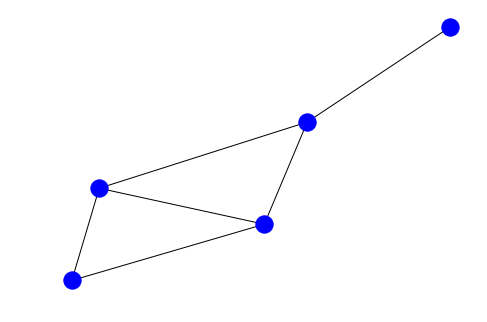

In [26]:
nx.draw(G_absorbing,node_color="b")
#maybe show node numbers

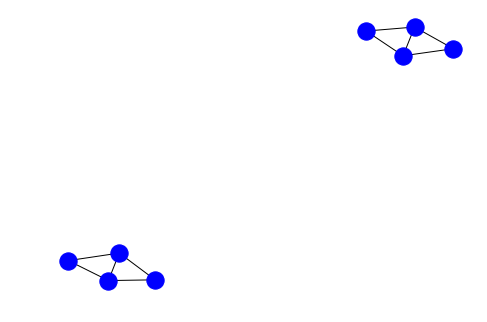

In [6]:
nx.draw(G_components,node_color="b")

As we can see when running the random surfer model a few times both graphs do not seem to converge completely. The absorbing graph has similar rankings with some variance. Here the dangling node does not allow the algorithm to get an exact result. The components graph has very different results because either one component is surfed or the other which causes the not surfed component to have rank 0.


#### Exercise 2.13

In [62]:
from random import random

def random_surfer_better(G,iterations,damping_factor=0.15):
    amount_nodes=len(G.nodes())
    ranks=[0]*amount_nodes
    edges=list(G.edges())
    
    current_node=randint(0,amount_nodes-1)
    
    for i in range(iterations):
        ranks[current_node]+=1
        neighbors=list(G[str(current_node)])        
                       
        if (random()>damping_factor) and (len(neighbors)>1):
                       current_node=int(choice(list(neighbors)))
        else:
                       current_node=randint(0,amount_nodes-1)
        
    
    if iter!=0:
        for i in range(len(ranks)):
            ranks[i]=ranks[i]/iterations
            
    return ranks


In [53]:
for i in range(10):
    print (random_surfer_better(G_absorbing,5000))

[0.2618, 0.2608, 0.095, 0.1864, 0.196]
[0.2544, 0.2612, 0.1016, 0.1914, 0.1914]
[0.2512, 0.2616, 0.102, 0.1838, 0.2014]
[0.2558, 0.2554, 0.0982, 0.1908, 0.1998]
[0.2546, 0.2578, 0.0976, 0.1954, 0.1946]
[0.2554, 0.2638, 0.0958, 0.1928, 0.1922]
[0.2582, 0.251, 0.0998, 0.1952, 0.1958]
[0.2592, 0.255, 0.0964, 0.1844, 0.205]
[0.2542, 0.2586, 0.1054, 0.1884, 0.1934]
[0.2578, 0.2474, 0.1104, 0.1868, 0.1976]


In [61]:
for i in range(10):
    print (random_surfer_better(G_components,5000))

[0.1166, 0.1362, 0.1328, 0.1202, 0.1254, 0.1168, 0.1328, 0.1192]
[0.1202, 0.1228, 0.1238, 0.1204, 0.133, 0.1218, 0.135, 0.123]
[0.1182, 0.1278, 0.1312, 0.1086, 0.1332, 0.1262, 0.1306, 0.1242]
[0.1222, 0.129, 0.1214, 0.1264, 0.124, 0.1192, 0.1428, 0.115]
[0.1108, 0.1312, 0.1314, 0.122, 0.1368, 0.1274, 0.1242, 0.1162]
[0.1112, 0.1272, 0.1342, 0.1264, 0.131, 0.124, 0.1324, 0.1136]
[0.119, 0.125, 0.1252, 0.1166, 0.1334, 0.1264, 0.1304, 0.124]
[0.1134, 0.1312, 0.1344, 0.1146, 0.1408, 0.116, 0.1286, 0.121]
[0.1188, 0.1326, 0.1344, 0.1272, 0.1256, 0.1166, 0.127, 0.1178]
[0.1176, 0.1338, 0.1392, 0.1152, 0.1294, 0.1206, 0.1324, 0.1118]


We can see better results and convergence with the second implementation. We think the page rank makes intuitive sense. For the component graph we can see that nodes in both components have similar ranks. The nodes with degree three have a higher score than the nodes with degree two which makes sense because they are more central. In the absorbing graph the dangling graph has a lower score that the other nodes which also makes sense. All in all page rank seems quite intuitive 

---

### 2.4.2 Power Iteration Method

#### Exercise 2.14: Power Iteration method

In [64]:
def power_iter(G,max_iter,damping_factor=0.85):
    #networkx pagerank does power iteration
    return nx.pagerank(G, alpha=damping_factor, max_iter=max_iter)

In [58]:
power_iter(G_components,1000)

{'0': 0.10239388052357877,
 '1': 0.1476061194764212,
 '2': 0.14760611947642116,
 '3': 0.10239388052357877,
 '4': 0.1476061194764212,
 '5': 0.10239388052357877,
 '6': 0.14760611947642116,
 '7': 0.10239388052357877}

In [63]:
G_wiki=nx.read_adjlist("data/wikipedia.graph")

In [67]:
power_iter(G_wiki,500)

{'0': 0.0002811365709548546,
 '4': 0.00017081706107945573,
 '307': 0.00016603984535536913,
 '312': 0.0002160028721179879,
 '316': 0.00013264977818620656,
 '367': 0.00027925655990128194,
 '438': 0.0002832552693504173,
 '444': 0.00026458531119823826,
 '508': 0.0006247566806847347,
 '593': 0.0006120493015724249,
 '594': 0.0001258567424228207,
 '653': 0.0005494944951862918,
 '671': 0.00046648737752147596,
 '672': 0.00019454559021017605,
 '700': 0.00035606536641365216,
 '819': 0.00017073490192187255,
 '839': 0.0001719133327735988,
 '878': 0.00014452740301565433,
 '1047': 0.0004809925663587129,
 '1125': 9.741879385855697e-05,
 '1208': 0.0005142800207068211,
 '1235': 0.001925002209972531,
 '1237': 0.00042401099816686557,
 '1363': 0.00040295930245424274,
 '1369': 0.0002784425673209868,
 '1671': 0.0002054301563828303,
 '1575': 0.00018709822671444828,
 '1609': 0.00010301032076493709,
 '1687': 0.00025796615782894126,
 '1818': 0.0018412257123001862,
 '1923': 9.875527413810469e-05,
 '2061': 0.00100

---

### 2.4.3 Gaming the system *(Bonus)*

#### Exercise 2.15 *(Bonus)*